This notebook computes uniformity metrics for $ugr$ dropouts.

In [1]:
import rubin_sim.maf as maf
import matplotlib.pyplot as plt
from lbg_survey_metrics.metrics import map_number_density, map_pz_mean, map_pz_sig
import numpy as np
from lbg_survey_metrics.metric_plots import plot_map

In [2]:
# Load m5 maps
u5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_u.npz").metric_values
g5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_g.npz").metric_values
r5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_r.npz").metric_values
i5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_i.npz").metric_values
z5 = maf.MetricBundle.load("data/rubin_sim_m5/internal_u_expt38_nscale1_1v3_4_10yrs_ExgalM5_z.npz").metric_values

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


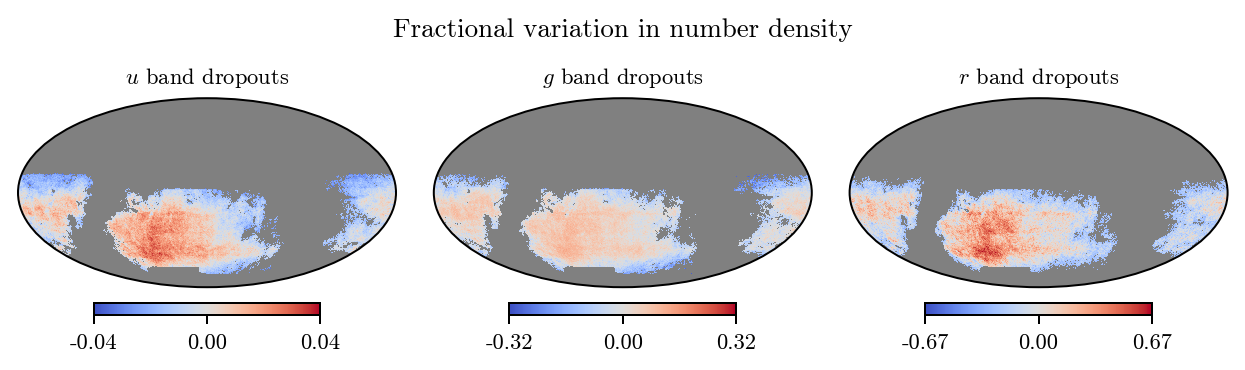

In [3]:
# Plot relative depth variations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), dpi=180)

# Set the title
fig.suptitle("Fractional variation in number density")

# u dropouts
n_u = map_number_density(u5, r5, "u")
rdn_u = (n_u - np.nanmean(n_u)) / np.nanmean(n_u)
plot_map(rdn_u, "$u$ band dropouts", sub=131)

# g dropouts
n_g = map_number_density(g5, i5, "g")
rdn_g = (n_g - np.nanmean(n_g)) / np.nanmean(n_g)
plot_map(rdn_g, "$g$ band dropouts", sub=132)

# r dropouts
n_r = map_number_density(r5, z5, "r", cut_on_drop=False)
rdn_r = (n_r - np.nanmean(n_r)) / np.nanmean(n_r)
plot_map(rdn_r, "$r$ band dropouts", sub=133)

# Hide axes
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Push axes closer together
plt.subplots_adjust(wspace=0.1)

fig.savefig("../figures/map_relative_density.pdf")

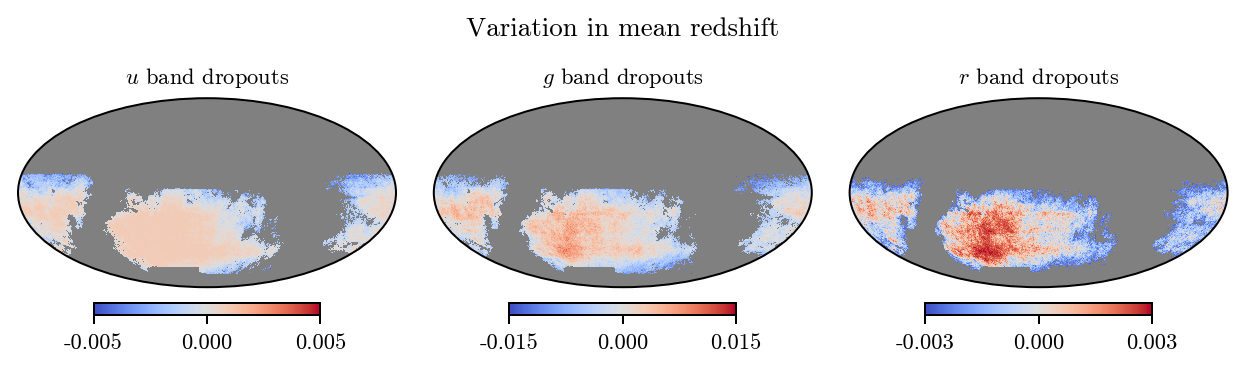

In [4]:
# Plot relative depth variations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), dpi=180)

# Set the title
fig.suptitle("Variation in mean redshift")

# u dropouts
pz_mean = map_pz_mean(u5, r5, "u")
dpz_mean = pz_mean - np.ma.average(pz_mean, weights=n_u)
plot_map(dpz_mean, "$u$ band dropouts", n_dec=3, sub=131)

# g dropouts
pz_mean = map_pz_mean(g5, i5, "g")
dpz_mean = pz_mean - np.ma.average(pz_mean, weights=n_g)
plot_map(dpz_mean, "$g$ band dropouts", n_dec=3, sub=132)

# r dropouts
pz_mean = map_pz_mean(r5, z5, "r", cut_on_drop=False)
dpz_mean = pz_mean - np.ma.average(pz_mean, weights=n_r)
plot_map(dpz_mean, "$r$ band dropouts", n_dec=3, sub=133)

# Hide axes
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Push axes closer together
plt.subplots_adjust(wspace=0.1)

fig.savefig("../figures/map_pz_mean.pdf")

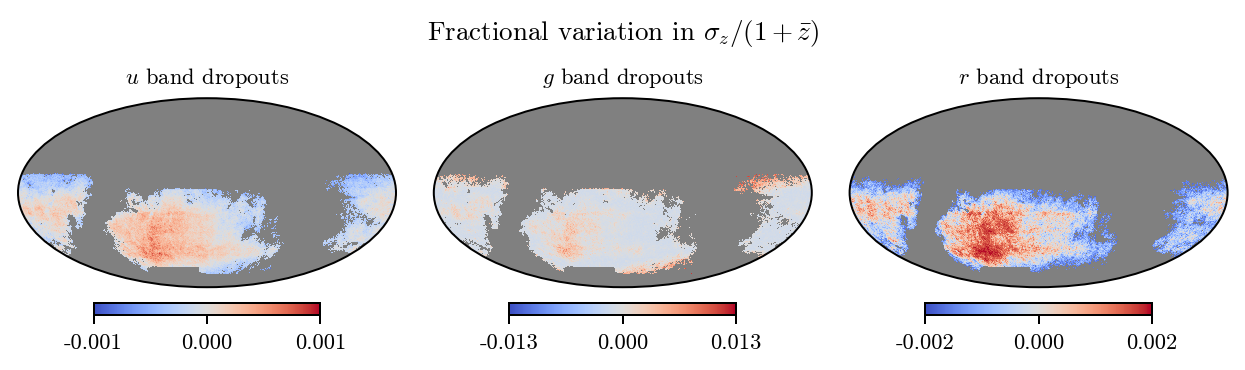

In [5]:
# Plot relative depth variations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2), dpi=180)

# Set the title
fig.suptitle(r"Fractional variation in $\sigma_z / (1 + \bar{z})$")

# u dropouts
pz_sig = map_pz_sig(u5, r5, "u")
rdpz_sig = (pz_sig - np.ma.average(pz_sig, weights=n_u)) / np.ma.average(pz_sig, weights=n_u)
plot_map(rdpz_sig, "$u$ band dropouts", n_dec=3, sub=131)

# g dropouts
pz_sig = map_pz_sig(g5, i5, "g")
rdpz_sig = (pz_sig - np.ma.average(pz_sig, weights=n_g)) / np.ma.average(pz_sig, weights=n_g)
plot_map(rdpz_sig, "$g$ band dropouts", n_dec=3, sub=132)

# r dropouts
pz_sig = map_pz_sig(r5, z5, "r", cut_on_drop=False)
rdpz_sig = (pz_sig - np.ma.average(pz_sig, weights=n_r)) / np.ma.average(pz_sig, weights=n_r)
plot_map(rdpz_sig, "$r$ band dropouts", n_dec=3, sub=133)

# Hide axes
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

# Push axes closer together
plt.subplots_adjust(wspace=0.1)

fig.savefig("../figures/map_pz_sig.pdf")